# <center>IPL Score Prediction using Machine Learning

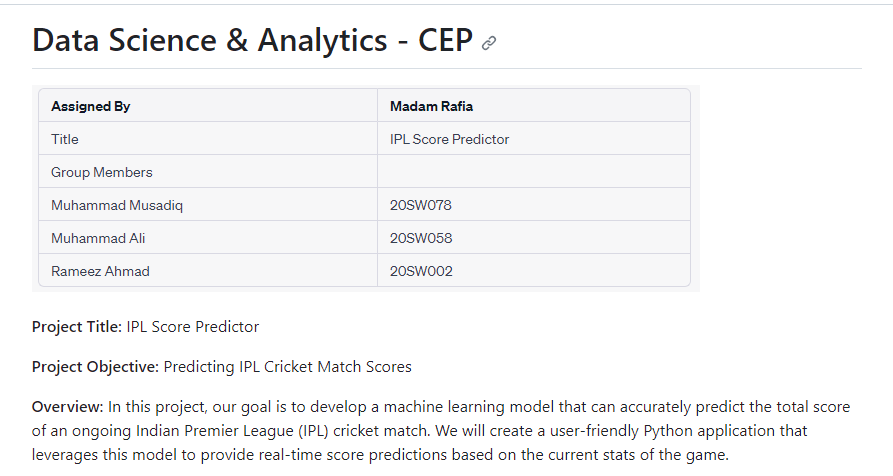.

# Import Necessary Libraries


**Description Comment:** In this code cell, we start by importing the essential libraries required for data analysis and visualization in our IPL Score Predictor project. These libraries include:

1. `pandas` (imported as `pd`): This library is used for data manipulation and analysis. It provides data structures like DataFrames for working with structured data.

2. `numpy` (imported as `np`): NumPy is a fundamental library for numerical computing in Python. It provides support for arrays and matrices, which are essential for numerical operations.

3. `seaborn` (imported as `sns`): Seaborn is a data visualization library based on Matplotlib. It is used to create visually appealing statistical graphics and plots.

4. `matplotlib.pyplot` (imported as `plt`): Matplotlib is a widely used plotting library in Python. We import the `pyplot` module to create various types of plots and charts.

These libraries will be used throughout the project for data loading, preprocessing, exploratory data analysis (EDA), and visualization.

In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Load the dataset

**Description Comment:** In this code cell, we import the dataset for our IPL Score Predictor project. The dataset is stored in a CSV file named 'ipl_data.csv'. We use the `pd.read_csv()` function from the Pandas library to read the CSV file and store it in a DataFrame called `ipl_df`.


`ipl_df`: This DataFrame will contain the IPL match data, including details such as match id, date, venue, batting team, bowling team, batsman, bowler, runs scored, wickets, overs, runs scored in the last 5 overs, wickets taken in the last 5 overs, striker batsman, non-striker batsman, and the total score.

After importing the dataset, the code prints a message indicating the successful import of the dataset along with its shape, which represents the number of rows and columns in the DataFrame. This step is essential for verifying that the data has been loaded correctly and for initial exploration.

In [3]:
#Importing dataset
ipl_df = pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (76014, 15)


# Exploratory Data Analysis

**What is EDA (Exploratory Data Analysis)?**
Exploratory Data Analysis, often abbreviated as EDA, is the process of examining and visualizing a dataset to understand its key characteristics, patterns, and relationships between variables. EDA helps data analysts and scientists get familiar with the data and uncover insights that can guide further analysis.

**Purpose of EDA:**
The primary purposes of EDA are as follows:

1. **Understanding the Data:** EDA helps you get a sense of what the data represents, what each column (feature) means, and what types of values it contains.

2. **Identifying Patterns:** EDA helps you identify patterns, trends, and anomalies in the data. For example, you can discover which teams score the most runs or which venues have the highest average scores.

3. **Handling Missing Data:** EDA helps you identify missing or incomplete data, which may need to be handled or imputed for analysis.

4. **Feature Selection:** EDA can assist in deciding which features (columns) are relevant for your analysis and modeling and which can be excluded.

5. **Visualizing Relationships:** EDA uses charts and graphs to visualize relationships between variables, such as how the total score varies with overs played or how different teams perform against each other.

**How to Perform EDA:**
Performing EDA typically involves the following steps:

1. **Data Loading:** Import your dataset into a data analysis tool like Python with libraries like Pandas.

2. **Summary Statistics:** Calculate basic statistics (e.g., mean, median, standard deviation) for numerical columns to understand central tendencies and dispersion.

3. **Data Visualization:** Create plots and graphs (e.g., histograms, scatter plots, bar charts) to visualize data distributions, trends, and relationships. This helps in identifying outliers and patterns.

4. **Handling Missing Data:** Identify and decide how to handle missing values, whether by imputation or removal.

5. **Feature Engineering:** Create new features or transform existing ones to make them more suitable for modeling.

6. **Hypothesis Testing:** Conduct statistical tests to validate hypotheses or assumptions about the data.

7. **Interpretation:** Draw insights and conclusions from the EDA process that can guide subsequent analysis or modeling.

In the context of IPL data, EDA would involve tasks like visualizing runs scored over different matches, analyzing how venues affect scores, and examining the performance of specific teams and players. EDA is a valuable step that helps you prepare the data for modeling and gain insights to make informed decisions.



In [4]:
# Displaying the First 5 Rows of IPL Dataset using head() method in pandas that is used to retrieve the first few rows
# (default is 5 rows)

# In this cell, we are displaying the first 5 rows (or samples) of our IPL dataset.
# This allows us to get an initial glimpse of what the data looks like.
# Each row represents a specific moment during an IPL match, and the columns contain various match-related details.
# By examining this initial subset, we can understand the structure and format of our data.

# The output shows the first 5 rows of the dataset, with columns like 'mid' (match ID), 'date', 'venue', 'bat_team' (batting team), 'bowl_team' (bowling team), 'batsman', 'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', and 'total' (target variable).
# These columns represent important information about each moment in an IPL match, such as who is batting and bowling, the number of runs scored, wickets taken, and other match-specific data.
# Displaying this initial data helps us understand the dataset's structure and what kind of information we have available for analysis.


ipl_df.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
# Describing the ipl_dfset

# The describe() method in pandas is used to generate descriptive statistics of a DataFrame or a specific column within a DataFrame.
# It provides a summary of various statistics for each numeric column in the DataFrame.

# count     76014.000000  # Number of non-null values in each column
# mean         308.627740  # Mean (average) value of each column
# std          178.156878  # Standard deviation, a measure of the spread of data
# min            1.000000  # Minimum value in each column
# 25%          154.000000  # 25th percentile, a value below which 25% of data falls
# 50%          308.000000  # 50th percentile, also known as the median
# 75%          463.000000  # 75th percentile, a value below which 75% of data falls
# max          617.000000  # Maximum value in each column

ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [6]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
# Number of Unique Values in each column
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [8]:
# ipl_df types of all Columns
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

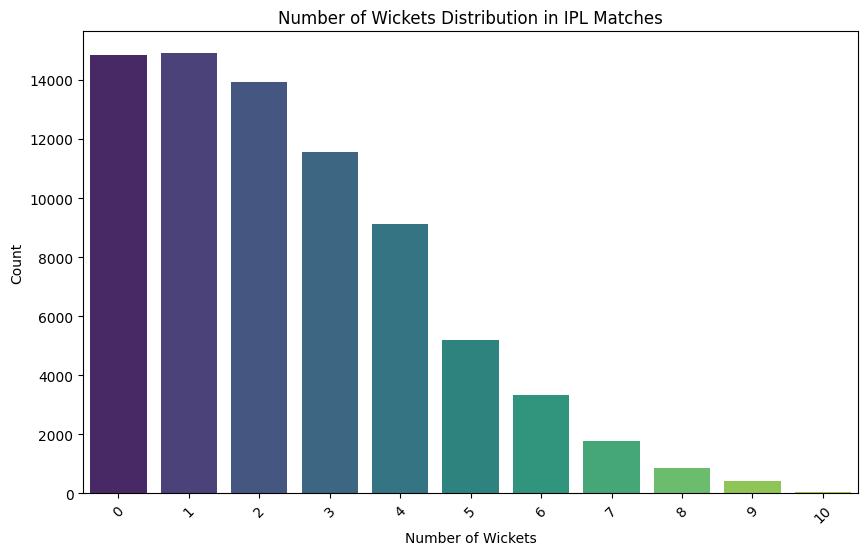

In [9]:
# Create a countplot to show wickets distribution

plt.figure(figsize=(10, 6))  # Create a figure with a specified size (width=10, height=6)
sns.countplot(x='wickets', data=ipl_df, palette='viridis')  # Create a countplot using Seaborn
plt.title("Number of Wickets Distribution in IPL Matches")  # Set the title of the plot
plt.xlabel("Number of Wickets")  # Set the label for the x-axis
plt.ylabel("Count")  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot


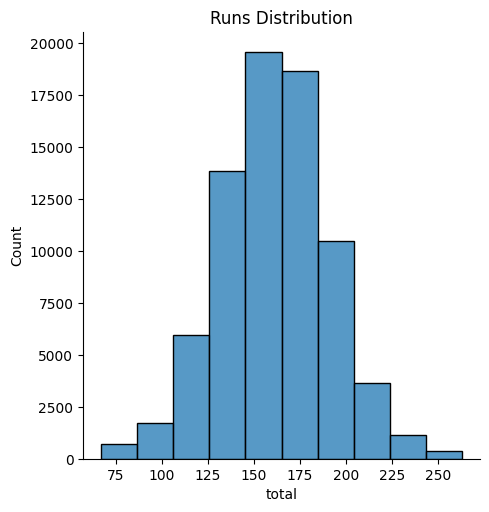

In [10]:
#Runs Distribution
sns.displot(ipl_df['total'], bins=10)
plt.title("Runs Distribution")

plt.show()

# Data Cleaning

#### Removing Irrelevant Data colunms

In [11]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train as it is going to predict the total score of a team at the end of 20 overs, not score of any particular batsman


In [12]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Keeping only Consistent Teams


In [13]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

In [15]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


Plotting a Correlation Matrix of current data

<ipython-input-16-41242b4b0b26>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(data=ipl_df.corr(), annot=True)


<Axes: >

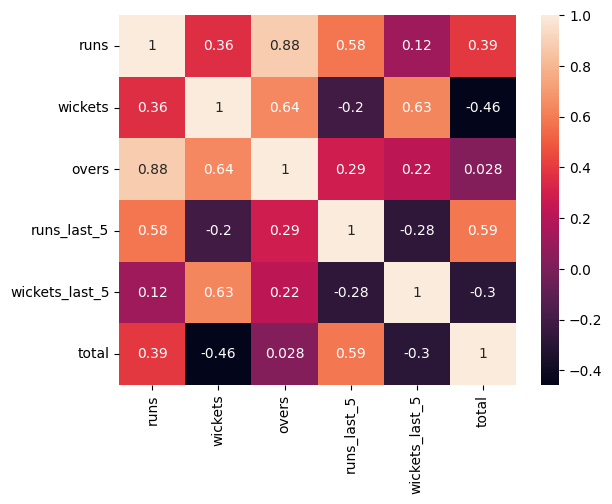

In [16]:
# from seaborn import heatmap: This line imports the heatmap function from the Seaborn library, which is used to create a heatmap for visualizing the correlation matrix.
# annot=True: This argument specifies that the values of the correlation coefficients should be displayed within each cell of the heatmap.

# 1. Correlation Measures Relationship: Correlation is a statistical measure that quantifies the degree of relationship between two variables, indicating whether they are related and how strongly.

# 2. Strength and Direction: Correlation coefficients range from -1 to 1. A positive value indicates a positive relationship, negative indicates a negative relationship, and 0 means no linear relationship. The closer to -1 or 1, the stronger the relationship.

# 3. No Causation**: Correlation does not imply causation. Even if two variables are correlated, it does not mean that one causes the other. Other factors may be at play.

# 4. Visual Representation: Correlations are often visualized using scatterplots. Positive correlations show an upward-sloping pattern, while negative correlations show a downward-sloping pattern.

# 5. Use in Data Analysis: Correlation analysis is essential for identifying patterns, feature selection, and understanding relationships in data. It's a valuable tool in various fields, such as finance and data science.

from seaborn import heatmap
heatmap(data=ipl_df.corr(), annot=True)

# Data Preprocessing and Encoding

#### Performing Label Encoding

In this step, we perform data preprocessing and label encoding to prepare the data for training machine learning models. Label encoding is used to convert categorical variables (in this case, 'bat_team' and 'bowl_team') into numerical format, as many machine learning algorithms require numerical input.


The code snippet uses the LabelEncoder from scikit-learn to encode the 'bat_team' and 'bowl_team' columns in the DataFrame 'ipl_df'. The LabelEncoder assigns a unique numerical value to each category in these columns. As a result, the categorical team names are transformed into numerical values, making them suitable for machine learning algorithms. The 'ipl_df' DataFrame is updated with the encoded values, as shown in the output. Now, the 'bat_team' and 'bowl_team' columns contain numerical representations of the respective team names.

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


#### Performing One Hot Encoding and Column Transformation

In this step, we use the ColumnTransformer along with One-Hot Encoding to further preprocess the data. One-Hot Encoding is applied to columns with categorical data ('bat_team' and 'bowl_team') to create binary columns for each category. This technique helps in handling categorical variables when building machine learning models.


 - You're importing the necessary modules, including ColumnTransformer and OneHotEncoder, from Scikit-Learn.

 - You create a ColumnTransformer object called columnTransformer that specifies how you want to transform the data. In this case, you're using the 'encoder' transformer, which applies OneHotEncoder, and specifying that you want to apply this encoder to columns with indices [0, 1].

 - The remainder='passthrough' argument means that any columns not specified in the transformation (columns other than 'bat_team' and 'bowl_team' in this case) will be kept as is without any transformation.

- In the context of one-hot encoding, binary columns are used to represent the presence or absence of a specific category. For instance, if you have three categories A, B, and C, each would have its binary column. If a row belongs to category A, the A column would have a 1, and the B and C columns would have 0s. This is a common technique to convert categorical data into a format that machine learning algorithms can work with, especially when there is no ordinal relationship between categories.

In [18]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0, 1])],
                                      remainder='passthrough')

In [19]:
# In this step, you're applying the transformation defined by the ColumnTransformer to your DataFrame ipl_df.
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

Save the Numpy Array in a new DataFrame with transformed columns

 - Created a new DataFrame with transformed columns

 - Create a new DataFrame 'df' from the transformed NumPy array 'ipl_df' with specified column names.

 - The columns include one-hot encoded batting and bowling teams, along with various match statistics.

 - These column names correspond to the one-hot encoded batting and bowling teams, as well as other numeric columns like 'runs,' 'wickets,' 'overs,' 'runs_last_5,' 'wickets_last_5,' and 'total.'

 - The df DataFrame now contains the transformed data with appropriate column names, making it easier to work with and analyze in subsequent steps of your project. It should have columns like 'batting_team_Chennai Super Kings,' 'runs,' 'overs,' 'wickets,' etc., with the data appropriately structured for further analysis and modeling.



In [20]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

In [21]:
# Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

## Prepare Train and Test Data

In [22]:
# features: This variable holds the features or independent variables that will be used to make predictions. You are creating it by dropping the 'total'
# column from the DataFrame df using the df.drop(['total'], axis=1) method. This means that features will contain all columns from df except 'total.'

# labels: This variable holds the target variable, which is 'total' in this case. You are creating it by selecting the 'total' column from the DataFrame df
# using df['total'].

# This code prepares the data for training and testing machine learning models. features will be used as input to the model, and labels will be the values
# the model tries to predict. This separation allows you to train a machine learning model to learn patterns in the data and make predictions based on the
# features provided.

features = df.drop(['total'], axis=1)
labels = df['total']

The concept of splitting a dataset into training and testing sets is fundamental in machine learning. Here's an overview of this concept:

Training Set:

The training set is a subset of the dataset that is used to train a machine learning model.
It consists of a portion of the data (e.g., 80% or 70%) and contains both the features (independent variables) and their corresponding labels (target variable).
The primary purpose of the training set is to teach the model to learn patterns, relationships, and dependencies within the data.
During training, the model adjusts its internal parameters to minimize the difference between its predictions and the actual labels in the training data.
Testing Set:

The testing set is another subset of the dataset that is kept separate from the training set.
It typically consists of the remaining portion of the data (e.g., 20% or 30%) and also contains features and labels.
The primary purpose of the testing set is to evaluate the model's performance on unseen data.
After training, the model is tested on the testing set to assess how well it generalizes its learning to new, unseen examples.
The testing set helps estimate how the model is likely to perform in real-world situations when it encounters data it has never seen before.

In [23]:
# Split Data into Training and Testing Sets

# Use train_test_split to create training and testing sets for machine learning

# This code is crucial for machine learning as it divides your dataset into two parts: one for training your model and the other for testing its performance.
# The training set is used to teach your model to make predictions, and the testing set is used to evaluate how well it generalizes to new, unseen data.



from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


## ML  Algorithms

In [24]:
# Initialize an empty dictionary to store machine learning models
models = dict()


#### 1. Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize a DecisionTreeRegressor model
tree = DecisionTreeRegressor()

# Train the DecisionTreeRegressor model on the training data
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [26]:
# Evaluate the Decision Tree Regressor model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)

# Print the train and test scores
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')

# Store the test score in the models dictionary
models["tree"] = test_score_tree

Train Score : 99.98%
Test Score : 86.25%


In [27]:
# Calculate and print the evaluation metrics for the Decision Tree Regressor model


from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.8896783844427825
Mean Squared Error (MSE): 124.3823236100723
Root Mean Squared Error (RMSE): 11.152682350451496


**Mean Absolute Error (MAE):** The MAE is approximately 3.97. It represents the average absolute difference between the actual target values and the predicted values by the model. In this case, a lower MAE indicates that the model's predictions are closer to the actual values on average.

**Mean Squared Error (MSE):** The higher MSE suggests that there might be some outliers in the predictions.

**Root Mean Squared Error (RMSE):** The RMSE of approximately 11.26 suggests that, on average, the model's predictions have an error of about 11.26 runs.
Like the MAE, a lower RMSE is desirable as it indicates that the model's predictions are closer to the actual values.


**Conclusion:** The Decision Tree Regressor model seems to perform reasonably well, with relatively low MAE and RMSE values. However, it's important to compare these metrics to the performance of other models to determine the best model for your specific prediction task.

#### 2. Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [29]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 66.13%
Test Score : 65.05%


In [30]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.255876745958506
Mean Squared Error (MSE): 316.2058521605533
Root Mean Squared Error (RMSE): 17.7821779363652


#### 3. Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [32]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.02%
Test Score : 93.49%


In [33]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.5344307588655015
Mean Squared Error (MSE): 58.892260860131444
Root Mean Squared Error (RMSE): 7.674129322609272


#### 4. Support Vector Machine

SVR stands for "Support Vector Regression." It is a type of supervised machine learning algorithm used for regression tasks. SVR is a variation of the Support Vector Machine (SVM) algorithm, which is primarily used for classification tasks. SVR is designed to find a regression function that best fits the data while minimizing the margin of error or maximizing the margin of confidence.

In SVR, the goal is to find a hyperplane (or regression line) that best represents the relationship between the input features and the target variable. The algorithm considers support vectors, which are data points that are closest to the regression line and play a crucial role in defining the margin of confidence. SVR is particularly useful when dealing with nonlinear and complex regression problems, as it can employ kernel functions to transform the input data into higher-dimensional spaces, making it capable of capturing intricate patterns in the data.

In [34]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [35]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm

Train Score : 57.54%
Test Score : 57.04%


In [36]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.825518462768592
Mean Squared Error (MSE): 388.73078681142573
Root Mean Squared Error (RMSE): 19.716256916854825


#### 5. XGBoost

Extreme Gradient Boosting

In [37]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 88.31%
Test Score : 85.06%


In [39]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.42315224880769
Mean Squared Error (MSE): 135.11192905044967
Root Mean Squared Error (RMSE): 11.623765700084016


#### 6. KNR

KNR stands for "K-Nearest Neighbors Regressor." It is a supervised machine learning algorithm used for regression tasks. KNR is an extension of the K-Nearest Neighbors (KNN) algorithm, which is primarily used for classification tasks. KNR is designed to predict a continuous target variable based on the values of its neighboring data points.

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [41]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 86.60%
Test Score : 77.76%


In [42]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 9.824183495387684
Mean Squared Error (MSE): 201.22093243580156
Root Mean Squared Error (RMSE): 14.185236425093576


## Best Model

<BarContainer object of 6 artists>

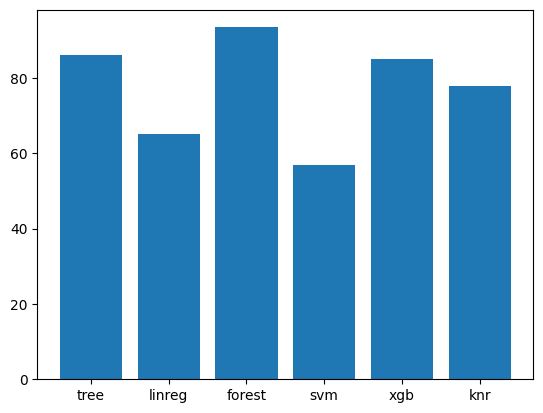

In [43]:
# This code is used to create a bar plot that visualizes the performance (accuracy) of different machine learning models.

import matplotlib.pyplot as plt
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **KNR**. So we will be choosing Random Forest for the final model

# Predictions

 - The score_predict function is used to make predictions for the total score in an IPL cricket match based on various input parameters.

 - model=forest sets a default model to be used for prediction (in this case, forest).

 - For the selected batting_team, the corresponding binary values are appended to the prediction_array. Each team is represented by an 8-element binary vector, where only one element is 1, indicating the selected team.

 - A similar set of conditional blocks exists for the bowling_team parameter, encoding it in a binary format.

 - The machine learning model (model) is used to make a prediction based on the input features in prediction_array.

 - The predicted score is rounded to the nearest integer, and this value is returned as the output of the function.

 - In summary, this function takes various input parameters related to the ongoing IPL cricket match, encodes the team names, combines them with other match-related statistics, and uses a machine learning model (forest by default) to predict the total score of the match. The predicted score is then returned as an integer.

In [44]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [45]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 144 || Actual Score : 147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [46]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')

Predicted Score : 183 || Actual Score : 176


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>


In [47]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 189 || Actual Score : 185


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [48]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 172 || Actual Score : 172


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [49]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 109 || Actual Score : 110


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 6
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [50]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 147 || Actual Score : 153


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 7
- Batting Team : **Sunrisers Hyderabad**
- Bowling Team : **Royal Challengers Banglore**
- Final Score : **146/10**

In [51]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 152 || Actual Score : 146


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Export Model

 - This code snippet is used to save the trained machine learning model (forest) to a file named "ml_model.pkl" using the pickle library.

 - This file can later be loaded to make predictions without the need to retrain the model.

 - The pickle.dump() function is used to serialize and save the forest model to the file specified by filename.

 - The "wb" mode is used when opening the file, which stands for "write binary." This mode is appropriate for saving binary data like serialized models.

In [52]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))